In [56]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn as sk

Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


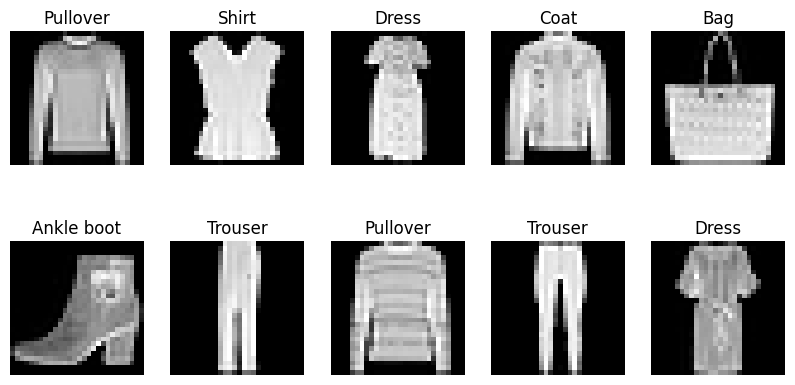

In [57]:
# Transformations : Convertir en tenseurs et normaliser
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Charger les données d'entraînement et de test
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform
)

# DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Vérification des données
classes = train_dataset.classes
print(f"Classes: {classes}")

# Afficher quelques images du dataset
def show_images(loader):
    images, labels = next(iter(loader))
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.show()

show_images(train_loader)

In [58]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = FashionCNN()
print(model)

FashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [60]:
# Initialisation des listes pour stocker les métriques
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

epochs = 20  # Nombre d'époques
for epoch in range(epochs):
    # Mode entraînement
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # Réinitialiser les gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calcul de la perte
        running_loss += loss.item()

        # Prédictions correctes
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Perte et accuracy pour l'entraînement
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Mode évaluation pour la validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Prédictions correctes
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Perte et accuracy pour la validation
    val_loss /= len(test_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Affichage des résultats pour l'époque
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")


Epoch 1/20, Train Loss: 0.4215, Train Accuracy: 84.83%, Val Loss: 0.3311, Val Accuracy: 87.89%
Epoch 2/20, Train Loss: 0.2711, Train Accuracy: 90.11%, Val Loss: 0.2814, Val Accuracy: 89.84%
Epoch 3/20, Train Loss: 0.2257, Train Accuracy: 91.76%, Val Loss: 0.2569, Val Accuracy: 90.61%
Epoch 4/20, Train Loss: 0.1923, Train Accuracy: 93.01%, Val Loss: 0.2461, Val Accuracy: 91.29%
Epoch 5/20, Train Loss: 0.1681, Train Accuracy: 93.76%, Val Loss: 0.2234, Val Accuracy: 92.19%
Epoch 6/20, Train Loss: 0.1433, Train Accuracy: 94.72%, Val Loss: 0.2387, Val Accuracy: 91.87%
Epoch 7/20, Train Loss: 0.1232, Train Accuracy: 95.41%, Val Loss: 0.2376, Val Accuracy: 91.52%
Epoch 8/20, Train Loss: 0.1026, Train Accuracy: 96.12%, Val Loss: 0.2743, Val Accuracy: 91.12%
Epoch 9/20, Train Loss: 0.0852, Train Accuracy: 96.90%, Val Loss: 0.2616, Val Accuracy: 91.96%
Epoch 10/20, Train Loss: 0.0720, Train Accuracy: 97.34%, Val Loss: 0.2737, Val Accuracy: 92.10%
Epoch 11/20, Train Loss: 0.0607, Train Accuracy: 

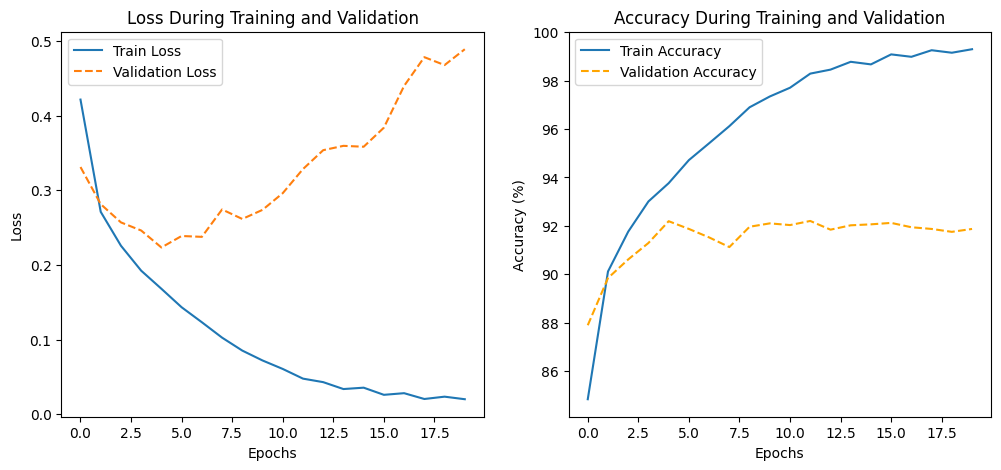

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss During Training and Validation")
plt.legend()

# Courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy", linestyle="--", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy During Training and Validation")
plt.legend()

plt.show()

In [62]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Accuracy on test set: {accuracy:.2f}%")

evaluate_model(model, test_loader)

Accuracy on test set: 91.87%


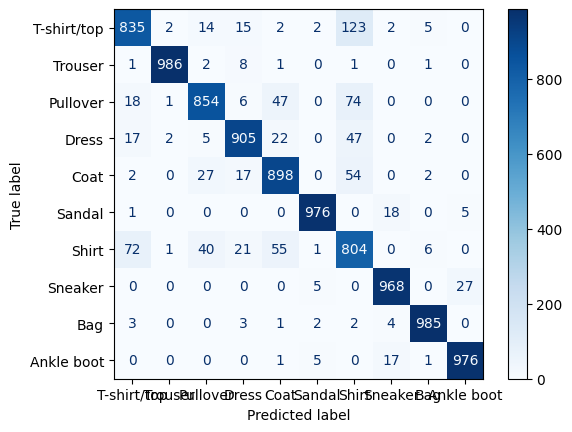

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcul des prédictions et des étiquettes réelles
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Génération et affichage de la matrice de confusion
conf_mat = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.show()


In [66]:
# Sauvegarder les poids du modèle entraîné
torch.save(model.state_dict(), "data/checkpoint/fashion_mnist_weights.pth")

In [67]:
model = FashionCNN()
model.load_state_dict(torch.load('data/checkpoint/fashion_mnist_weights.pth'))
model.eval()

torch.onnx.export(
    model, 
    torch.randn(1, 1, 28, 28),  
    "docs/static/model//fashion_mnist.onnx", 
    do_constant_folding=True,  
    export_params=True,        
    opset_version=10,         
    input_names=["image"], 
    output_names=["preds"], 
    verbose=True
)

C:\Users\ieabi\AppData\Local\Temp\ipykernel_19880\3596054476.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('data/checkpoint/fashion_mn